#Digital Image Processing - Segmentação - 2022.1
##Aluno: Derek Nielsen Araújo Alves - Engenharia de Computação - 17212092
##Professor: Tiago Vieira


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [80]:
def pltImgs(imgs, tits):
  plt.figure(figsize = (10*len(tits), 10), facecolor='silver')

  for i in range(len(imgs)):
      plt.subplot(1, len(imgs), i+1)
      plt.imshow(imgs[i], cmap='gray')
      plt.title(tits[i])
  plt.show()

##Carregar a imagem 'chips.png'.

(391, 518)


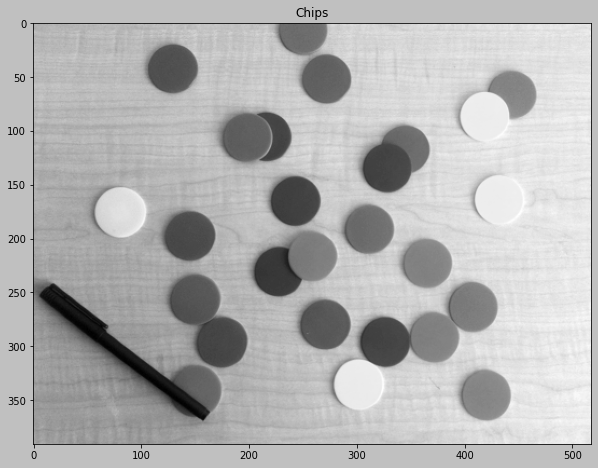

In [81]:
img = cv2.imread('chips.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
pltImgs([img], ['Chips'])

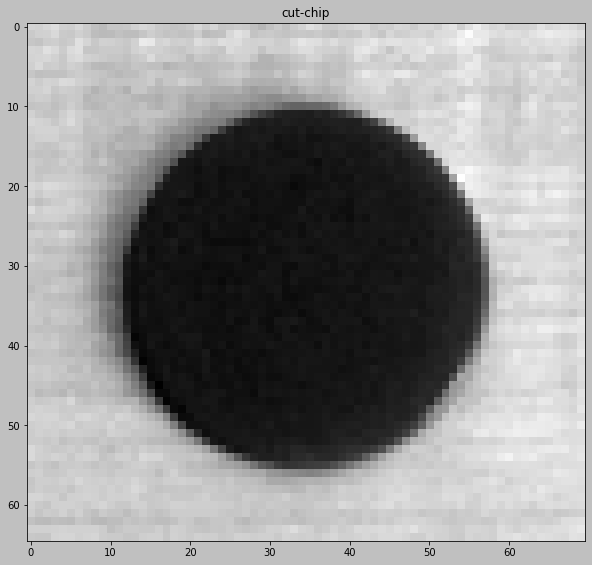

In [82]:
cut_img = img[10:75, 95:165]
pltImgs([cut_img], ['cut-chip'])

##Calcular o gradiente e mostrar uma imagem com os vetores sobrepostos à imagem 'chips.png', utilizando a função 'quiver'.

In [83]:
def quiverPlot(img, gy, gx, tit):
  plt.figure(figsize=(10, 20), facecolor='silver')
  plt.title(tit)
  plt.imshow(img, cmap='cividis')
  plt.quiver(gx, gy)
  plt.show()

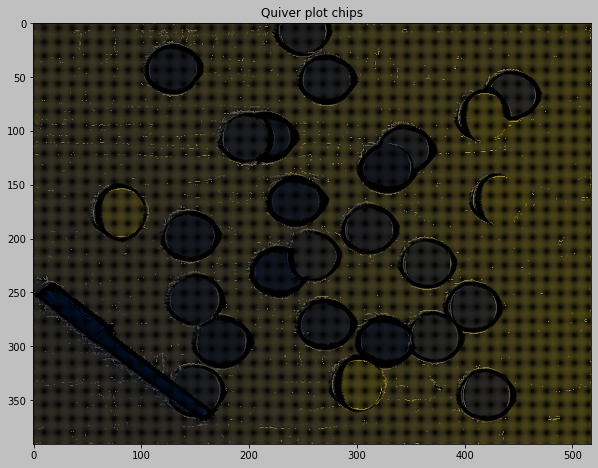

In [84]:
grad = np.array(img)
_gy, _gx = np.gradient(grad)
quiverPlot(grad, _gy, _gx, 'Quiver plot chips')

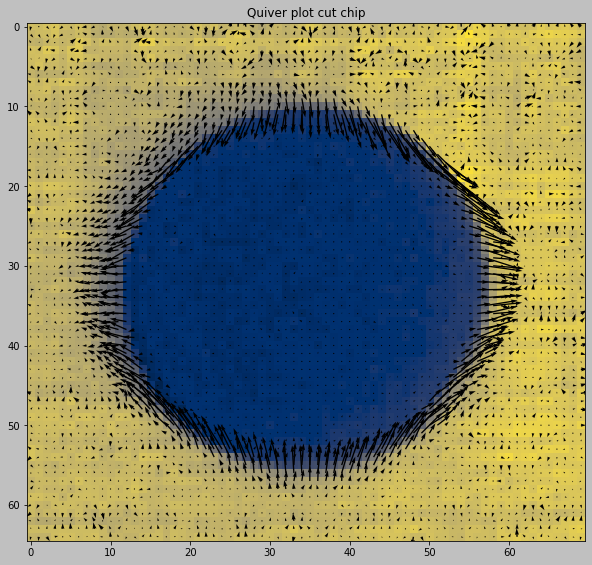

In [85]:
chip = np.array(cut_img)
gy, gx = np.gradient(chip)
quiverPlot(chip, gy, gx, 'Quiver plot cut chip')

##Obter a magnitude do gradiente e limiarizá-la.

In [86]:
def mg_thres(gy, gx):
  mag = abs(gx) + abs(gy)
  _, t = cv2.threshold(mag, (1/3)*mag.max(), 255, cv2.THRESH_BINARY)

  return mag, t

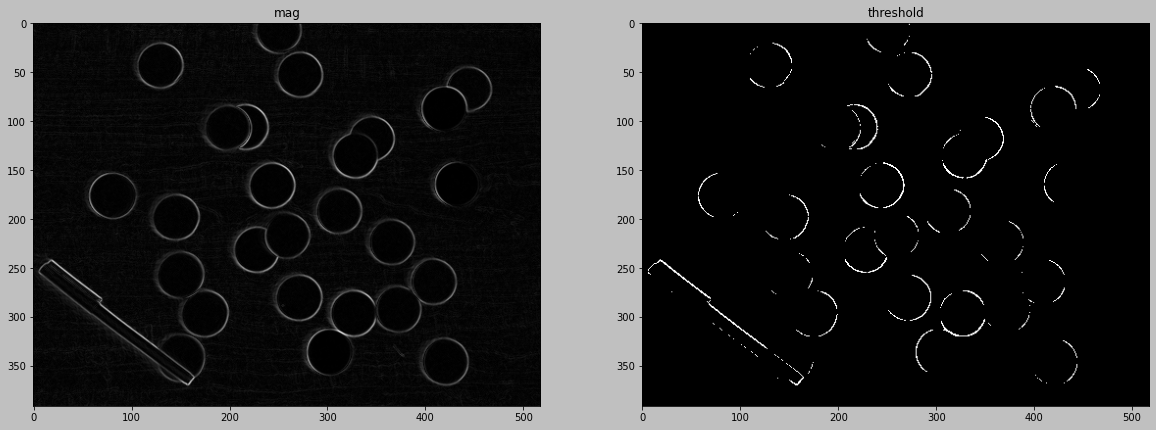

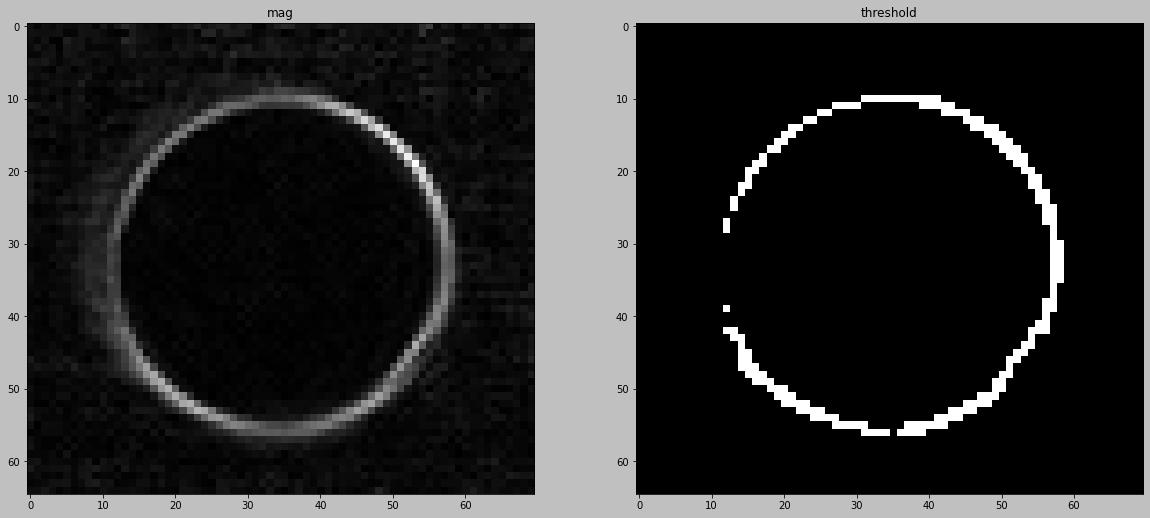

In [87]:
m, t = mg_thres(_gy, _gx)
pltImgs( [m, t], ['mag', 'threshold'])
m, t = mg_thres(gy, gx)
pltImgs( [m, t], ['mag', 'threshold'])

##Obter as bordas dos discos utilizando o algoritmo 'canny'.

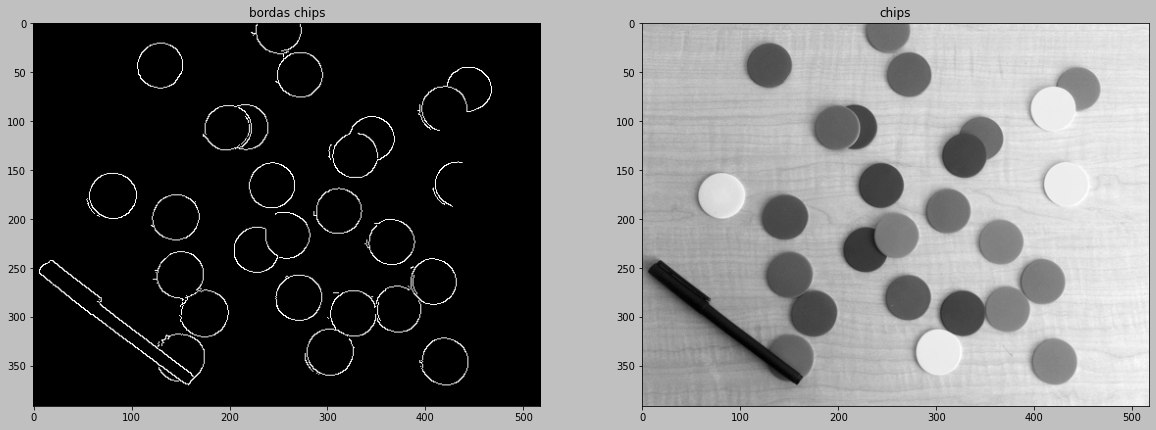

In [88]:
borders = cv2.Canny(img, 75, 175)
pltImgs([borders, img], ['bordas chips', 'chips'])